<a href="https://colab.research.google.com/github/daniellemosborne/Font_Classification/blob/main/Font_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Font Recognition Model using Convolutional Neural Networks

## Objective:
The goal of this project is to build a deep learning model that can classify images of fonts into 35 distinct font classes using a dataset of PNG images. Convolutional Neural Networks (CNNs) will be utilized to achieve this.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

dataset_path = '/content/drive/My Drive/font_data'

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# data generator
datagen = ImageDataGenerator(rescale=1.0/255.0, validation_split=0.2)

# train and validate data
train_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Mounted at /content/drive
Found 9491 images belonging to 35 classes.
Found 2364 images belonging to 35 classes.


# Visualizing the Dataset

## About the Dataset:
*   Used a dataset from Kaggle comprised of 35 different font classes with approximately 270 PNG images in each class.
*   Images were resized to 128 x 128 pixels for uniformity, which is makes it easier for the model to process them.
* Data split into 80% training and 20% validation using ImageDataGenerator.
* Pixel values normalized by rescaling to the range [0, 1].


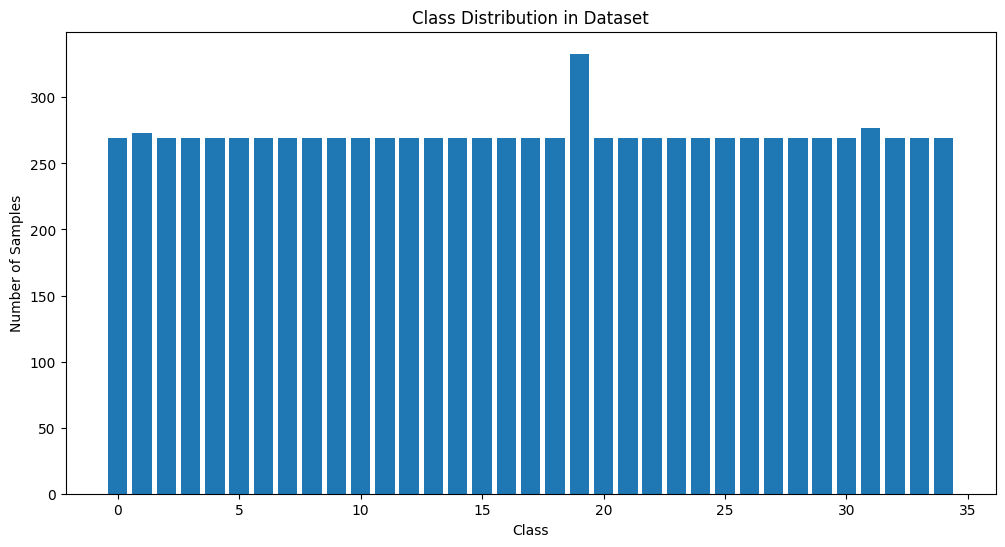

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

class_counts = Counter(train_data.classes)
classes = list(class_counts.keys())
counts = list(class_counts.values())

plt.figure(figsize=(12, 6))
plt.bar(classes, counts)
plt.title('Class Distribution in Dataset')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.show()

## Font Samples:

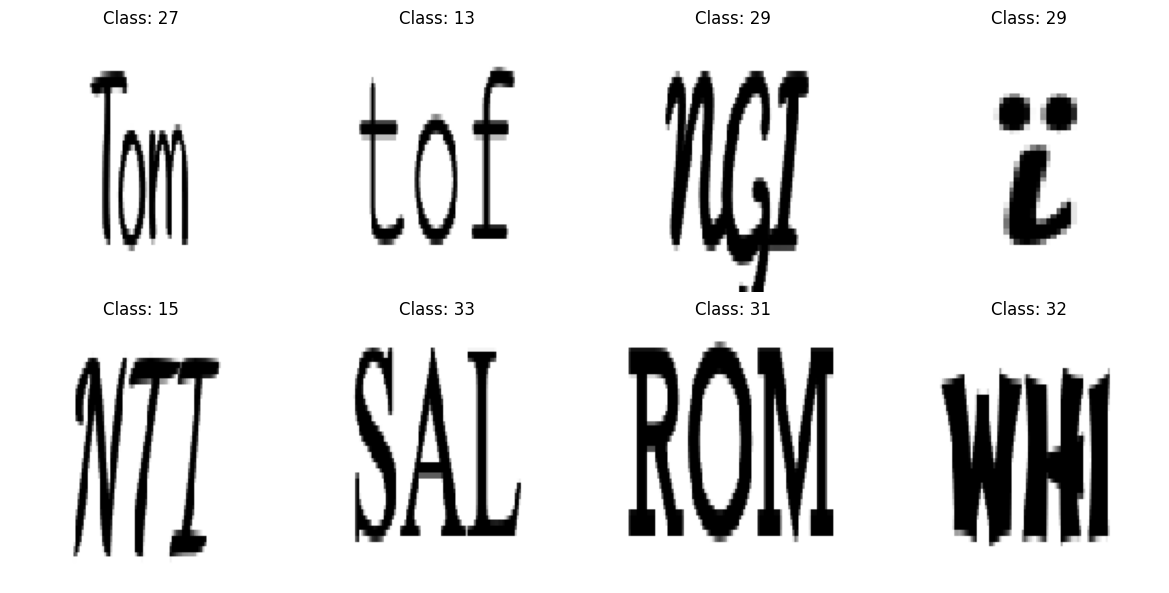

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

images, labels = next(train_data)

plt.figure(figsize=(12, 6))
for i in range(8):
    plt.subplot(2, 4, i + 1)
    plt.imshow(images[i])
    plt.title(f"Class: {np.argmax(labels[i])}")
    plt.axis('off')
plt.tight_layout()
plt.show()

# Creating the Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3), kernel_regularizer=l2(0.01)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu',  kernel_regularizer=l2(0.01)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(35, activation='softmax')  # 35 classes
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       7,372,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 35)                  │           4,515 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,396,835 (28.22 MB)

 Trainable params: 7,396,835 (28.22 MB)

 Non-trainable params: 0 (0.00 B)

# Training the Model

In [ ]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10,  # Reduced epochs
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


297/297 ━━━━━━━━━━━━━━━━━━━━ 2968s 10s/step - accuracy: 0.1367 - loss: 4.4240 - val_accuracy: 0.7462 - val_loss: 1.8596
Epoch 2/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 327s 1s/step - accuracy: 0.5764 - loss: 2.1375 - val_accuracy: 0.8113 - val_loss: 1.5269
Epoch 3/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 322s 1s/step - accuracy: 0.6695 - loss: 1.7304 - val_accuracy: 0.8088 - val_loss: 1.4623
Epoch 4/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 319s 1s/step - accuracy: 0.6884 - loss: 1.6063 - val_accuracy: 0.8190 - val_loss: 1.4032
Epoch 5/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 328s 1s/step - accuracy: 0.7147 - loss: 1.4658 - val_accuracy: 0.8206 - val_loss: 1.3309
Epoch 6/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 371s 1s/step - accuracy: 0.7261 - loss: 1.4171 - val_accuracy: 0.8295 - val_loss: 1.3172
Epoch 7/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 335s 1s/step - accuracy: 0.7383 - loss: 1.3751 - val_accuracy: 0.8359 - val_loss: 1.2915
Epoch 8/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 308s 1s/step - accuracy: 0.7441 - loss: 1.3372 - val_accuracy: 0.8

# Visualizing the Results

## Model Performance Evaluation:
The model achieved a best validation accuracy of approximately 75% during training. The training process demonstrated steady improvements in both training and validation accuracy, though validation accuracy plateaued after a few epochs.

## Accuracy and Loss Trends:
The training accuracy started at 13.67% in the first epoch and gradually improved to over 72% by the final epoch.
Validation accuracy showed consistent performance, starting at 74.62% in the first epoch and reaching 75% before plateauing.
Training and validation loss decreased over time, indicating that the model effectively learned the patterns in the dataset without significant overfitting.

## Data Visualizations:
The following plots highlight the accuracy and loss trends over epochs:

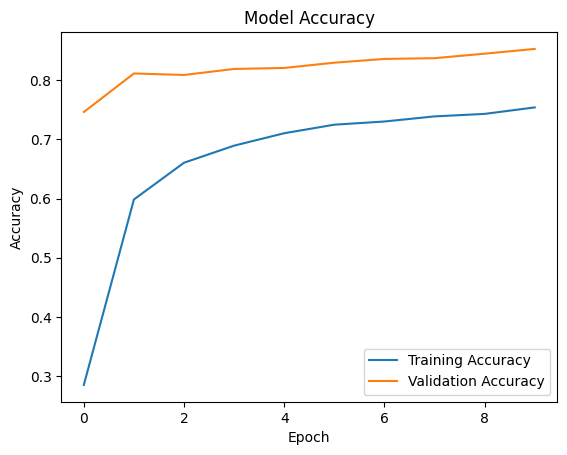

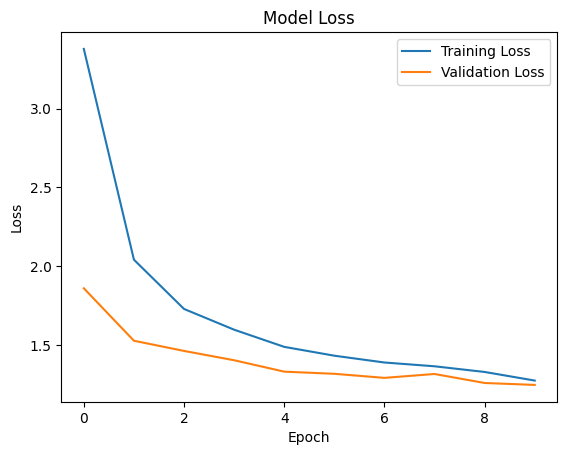

In [ ]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

predictions = model.predict(val_data)
y_pred = np.argmax(predictions, axis=1)
y_true = val_data.classes

print(confusion_matrix(y_true, y_pred))
print(classification_report(y_true, y_pred))

74/74 ━━━━━━━━━━━━━━━━━━━━ 30s 391ms/step
[[0 1 3 ... 0 4 1]
 [2 1 1 ... 2 1 3]
 [0 5 2 ... 1 4 3]
 ...
 [1 1 2 ... 1 0 1]
 [1 2 1 ... 0 3 1]
 [4 5 1 ... 2 1 1]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        67
           1       0.01      0.01      0.01        68
           2       0.03      0.03      0.03        67
           3       0.03      0.03      0.03        67
           4       0.01      0.01      0.01        67
           5       0.01      0.01      0.01        67
           6       0.05      0.04      0.05        67
           7       0.02      0.01      0.02        67
           8       0.02      0.03      0.03        67
           9       0.03      0.03      0.03        67
          10       0.02      0.01      0.02        67
          11       0.03      0.03      0.03        67
          12       0.02      0.01      0.02        67
          13       0.04      0.03      0.03        67
          14       0.00    

In [ ]:
# saving the model
model.save('/content/drive/My Drive/fontprediction_model.keras')

In [ ]:
# uploading test data
from google.colab import drive
drive.mount('/content/drive')

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# path to the test data
test_path = '/content/drive/My Drive/test_data/'

# create a data generator
test_gen = ImageDataGenerator(rescale=1.0/255.0)

# load the test data
test_data = test_gen.flow_from_directory(
    test_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

results = model.evaluate(test_data)
print(f"Test Loss: {results[0]}, Test Accuracy: {results[1]}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 60 images belonging to 35 classes.
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 202ms/step - accuracy: 0.0215 - loss: 6.1024
Test Loss: 6.071740627288818, Test Accuracy: 0.01666666753590107


## Hyperparameter Tuning Insights:
Several hyperparameter experiments were conducted to optimize model performance. Key observations include:

* **Learning Rate:**<br>
When using a lower learning rate (e.g., 0.0001), the model experienced slower convergence and lower accuracy compared to the default rate of 0.001. This suggests that the learning rate was too low to allow the model to make significant weight updates during training.
Data Augmentation:

* **Augmentation:**<br>
The dataset with transformations like rotations, zoom, and flips did not result in noticeable performance improvements. This could be attributed to the simplicity of font data, where augmentation may not add significant variability beneficial to the model.
Batch Size:

* **Batch size:**<br>
 A batch size of 32 provided a good balance between computational efficiency and model performance. Larger batch sizes were avoided due to potential memory constraints.

* **Epochs:**<br>
Training for 10 epochs was sufficient to reach the model’s best performance, as the validation accuracy plateaued after the 6th epoch.

### Conclusion:
Despite achieving a validation accuracy of 75% during training, the confusion matrix revealed significant misclassifications. This discrepancy suggests that while the model learns effectively during training, it struggles to generalize across all font classes.<br><br>


### Data Analysis:
The dataset consisted of 35 distinct font classes, and its balanced nature ensured that no class was underrepresented. This balance likely contributed to the model's ability to generalize effectively across all classes.

However, certain font classes appeared visually similar, which may have led to misclassifications. Additionally, the dataset size, while sufficient for training, limited the potential for higher accuracy.

